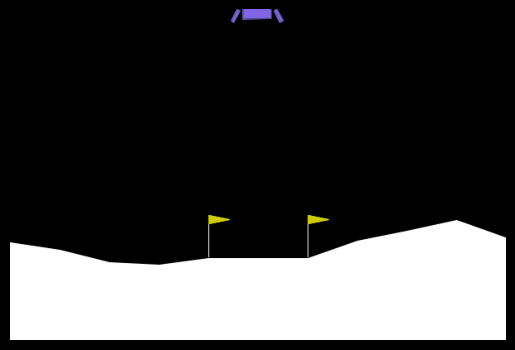

In [2]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import numpy as np

env = gym.make('LunarLander-v3', render_mode='rgb_array')
# Plot the sample observation
env.reset()
plt.imshow(env.render())
plt.axis('off')
plt.show()

In [3]:
model = DQN('MlpPolicy', env, verbose=1).learn(total_timesteps=int(2e5), progress_bar=True)
model.save('dqn-lunar-lander')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/geraldamasi/PycharmProjects/RL/.venv/lib/python3.13/site-packages/rich/live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.2     |
|    ep_rew_mean      | -179     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3549     |
|    time_elapsed     | 0        |
|    total_timesteps  | 325      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25     |
|    n_updates        | 56       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89       |
|    ep_rew_mean      | -184     |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3057     |
|    time_elapsed     | 0        |
|    total_timesteps  | 712      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates      

Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 415      |
|    ep_rew_mean      | -179     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 1832     |
|    time_elapsed     | 25       |
|    total_timesteps  | 45954    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.472    |
|    n_updates        | 11463    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 433      |
|    ep_rew_mean      | -168     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 1806     |
|    time_elapsed     | 26       |
|    total_timesteps  | 48249    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29     |
|    n_updates      

In [4]:
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward}')

Mean reward: -121.4063121 +/- 25.578266724347582


In [8]:
vec_env = model.get_env()
obs = vec_env.reset()
for _ in range(1000):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, dones, info = vec_env.step(action)
    vec_env.render('human')